# Qiskit Quantinuum Provider

### Set up the connection

In [2]:
%pip install qiskit-quantinuum-provider

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement qiskit-quantinuum-provider (from versions: none)
ERROR: No matching distribution found for qiskit-quantinuum-provider


In [6]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_quantinuum import Quantinuum

### Save my quantinuum Account

In [8]:
from pytket.circuit import Circuit, fresh_symbol, OpType
from pytket.circuit.display import render_circuit_jupyter

from pytket.extensions.quantinuum import QuantinuumBackend

machine = 'H1-1E'

backend = QuantinuumBackend(device_name = machine)
backend.login()

In [9]:
print(machine, "status: ", QuantinuumBackend.device_state(device_name = machine))

H1-1E status:  online


### Circuit Preparation

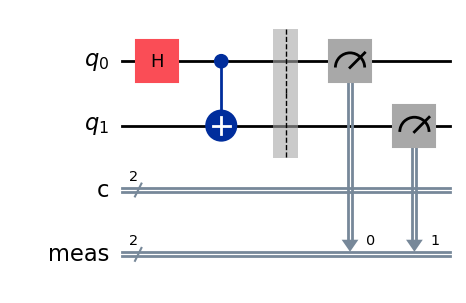

In [10]:
n_qubits = 2
circuit = QuantumCircuit(n_qubits, n_qubits, name='Bell Test')
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()

circuit.draw('mpl',style='iqp')

In [31]:
device = 'H1-1E'
backend = Quantinuum.get_backend(device)

Your id token is expired. Refreshing...


In [32]:
status = backend.status()

print(device, "status :", status.status_msg)

H1-1E status : online


In [33]:
shots = 100
job = execute(circuit, backend, shots=shots)

In [46]:
from qiskit.primitives import BackendSampler
sampler = BackendSampler(backend)

In [47]:
job = sampler.run(circuit, shots=shots)

In [48]:
job.status()

<JobStatus.RUNNING: 'job is actively running'>

In [35]:
result = job.result()

print("Job ID:", result.job_id)
print("Job success:", result.success)

Job ID: d12c2c336f3b491babbdf51fb144e944
Job success: True


In [36]:
counts = result.get_counts()
print("Total count for 00 and 11 are:",counts)

# Result should not be '0', it should be '00'!

Total count for 00 and 11 are: {'11': 50, '1': 1, '0': 49}


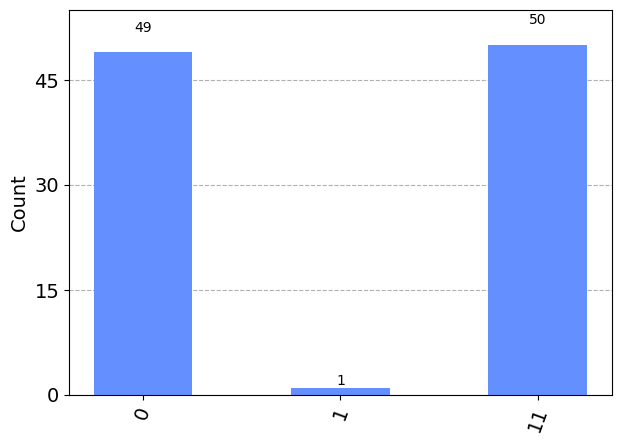

In [37]:
plot_histogram(counts)

In [38]:
import json

with open(f'results_{result.job_id}.json', 'w') as f:
    json.dump(result.get_counts(), f)